In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('./Output/NEES_summary_with_heliquest.csv')

In [11]:
df.columns

Index(['AA_seq', 'AH', 'Median', 'Mean', 'Organelle', 'NEES_binned', 'phil_A',
       'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L',
       'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M',
       'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S',
       'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N',
       'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E',
       'phil_H', 'phob_H', 'phil_P', 'phob_P', 'Length', 'Hydrophobicity',
       'H_moment', 'Netcharge', 'Dfactor', 'phil_S_T', 'phil_R_K', 'phil_L_I',
       'phil_F_W', 'phil_M_C', 'phil_D_E', 'phil_N_Q', 'phob_S_T', 'phob_R_K',
       'phob_L_I', 'phob_F_W', 'phob_M_C', 'phob_D_E', 'phob_N_Q'],
      dtype='object')

In [12]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# List of the columns we are interested in
columns_of_interest = ['phil_S', 'phil_T', 'phil_K', 'phil_R']

# Define the specific order for the NEES_binned categories
order = ['No Response', 'Moderate Response', 'High Response', 'Very High Response']

/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_2223/1473673554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEES_binned', y=col, data=df, ax=axes[row, col_idx], order=order, palette="Blues")
/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_2223/1473673554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEES_binned', y=col, data=df, ax=axes[row, col_idx], order=order, palette="Blues")
/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_2223/1473673554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

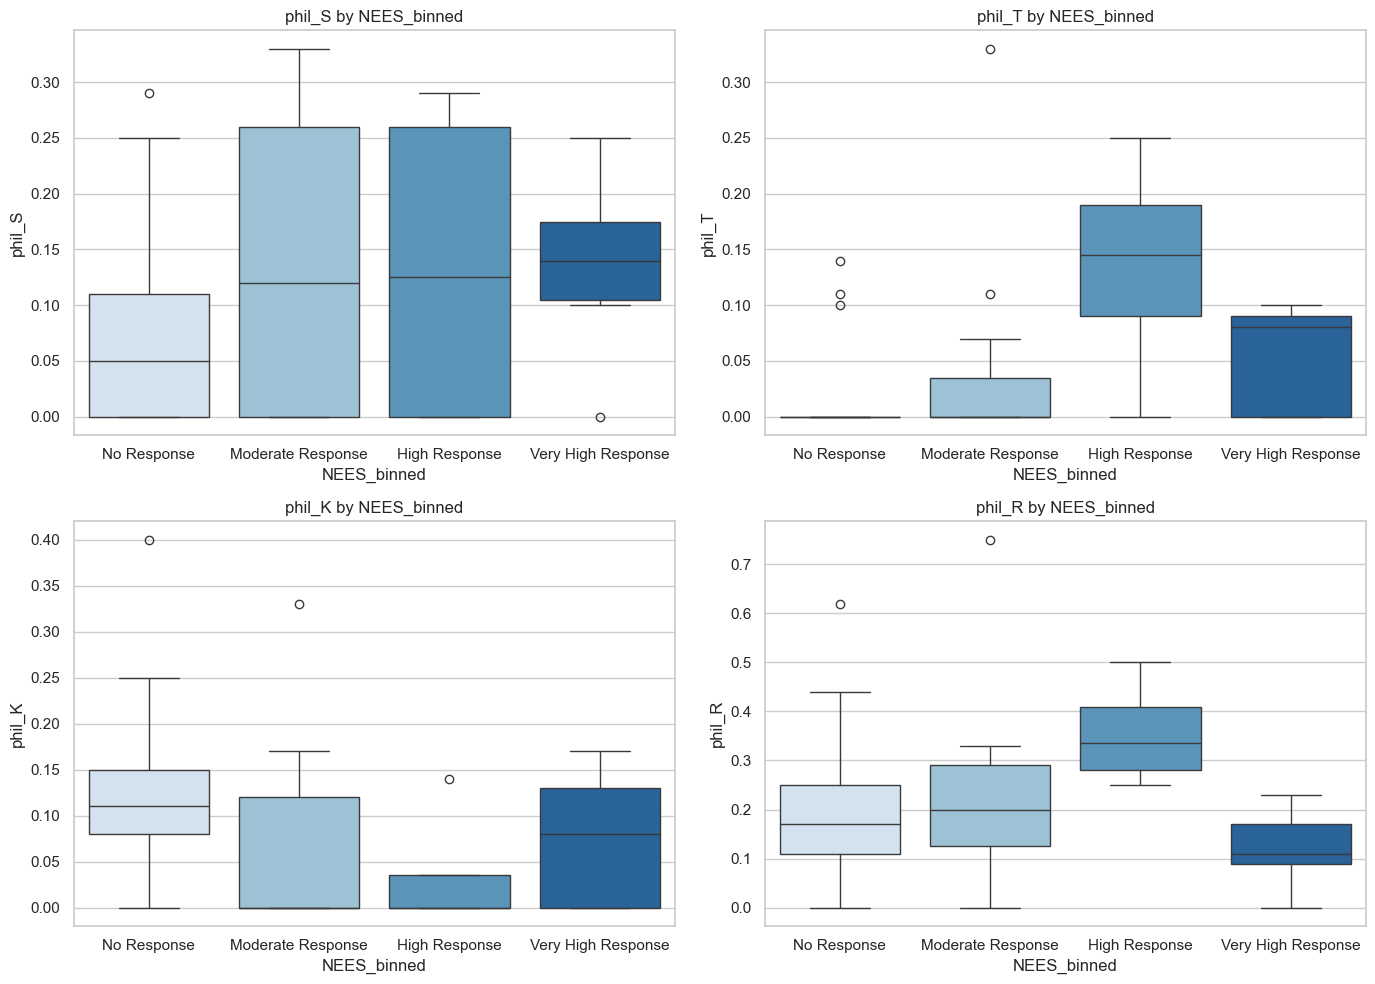

In [13]:
# Plot
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, col in enumerate(columns_of_interest):
    # Determine the row and column index for the current subplot
    row = idx // 2
    col_idx = idx % 2
    
    # Create a boxplot with the specified order
    sns.boxplot(x='NEES_binned', y=col, data=df, ax=axes[row, col_idx], order=order, palette="Blues")
    axes[row, col_idx].set_title(f'{col} by NEES_binned')
    axes[row, col_idx].set_xlabel('NEES_binned')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_2223/173712153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEES_binned', y='phil_S_T', data=df, order=order, palette="Blues")


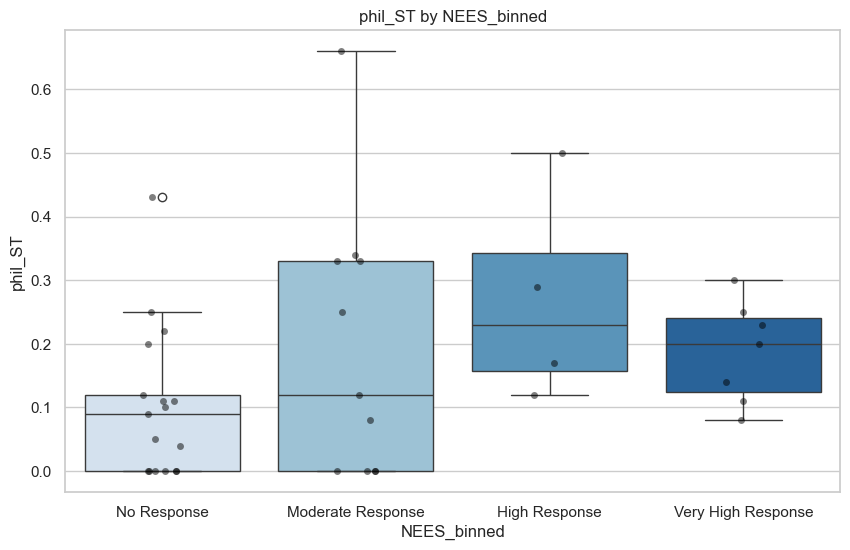

In [15]:
# Create a box plot for the new column 'phil_ST' by 'NEES_binned'
plt.figure(figsize=(10, 6))
sns.boxplot(x='NEES_binned', y='phil_S_T', data=df, order=order, palette="Blues")
# Add scatter points jittered for better visualization
sns.stripplot(x='NEES_binned', y='phil_S_T', data=df, order=order, color='black', jitter=True, alpha=0.5)

plt.title('phil_ST by NEES_binned')
plt.xlabel('NEES_binned')
plt.ylabel('phil_ST')
plt.show()

/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_2223/834101560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEES_binned', y='phil_R_K', data=df, order=order, palette="Blues")


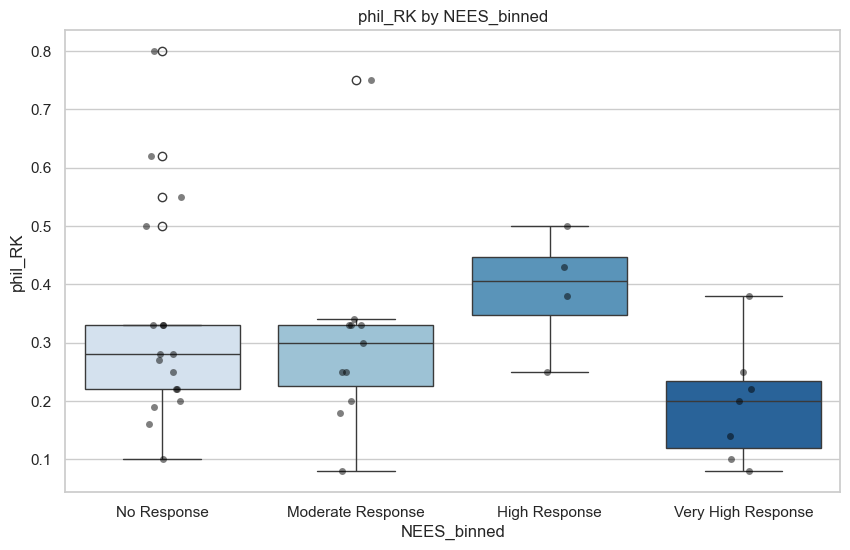

In [16]:
# Create a box plot for the new column 'phil_RK' by 'NEES_binned'
plt.figure(figsize=(10, 6))
sns.boxplot(x='NEES_binned', y='phil_R_K', data=df, order=order, palette="Blues")
# Add scatter points jittered for better visualization
sns.stripplot(x='NEES_binned', y='phil_R_K', data=df, order=order, color='black', jitter=True, alpha=0.5)

plt.title('phil_RK by NEES_binned')
plt.xlabel('NEES_binned')
plt.ylabel('phil_RK')
plt.show()

/var/folders/qv/j3ddjz6j0qq0nh7cbqghj4wh0000gn/T/ipykernel_2223/4204220732.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NEES_binned', y='phil_ST_RK', data=df, order=order, palette="Blues")


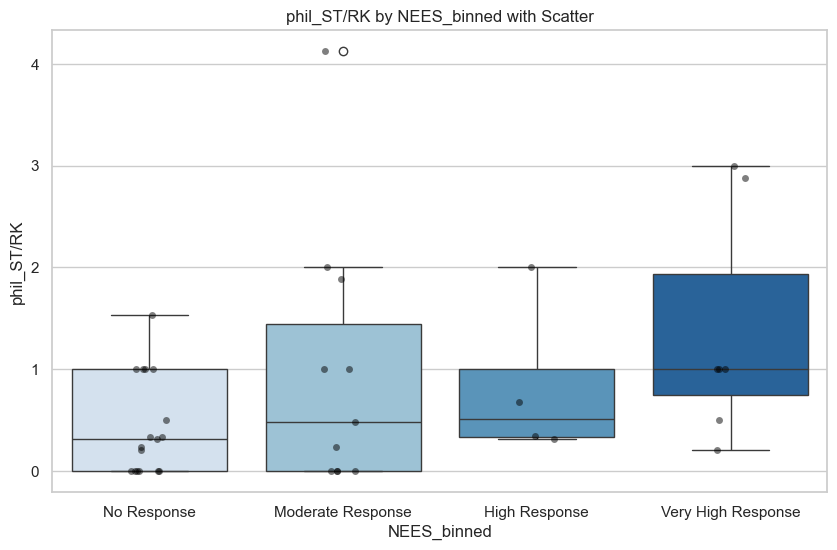

In [23]:
# create ST:RK ratio and round it to 2 decimail points
df['phil_ST_RK'] = (df['phil_S_T'] / df['phil_R_K']).round(3)

# Create a box plot overlaid with scatter plot for 'phil_ST_RK' by 'NEES_binned'
plt.figure(figsize=(10, 6))

# Create a boxplot with the specified order
sns.boxplot(x='NEES_binned', y='phil_ST_RK', data=df, order=order, palette="Blues")

# Add scatter points jittered for better visualization
sns.stripplot(x='NEES_binned', y='phil_ST_RK', data=df, order=order, color='black', jitter=True, alpha=0.5)

plt.title('phil_ST/RK by NEES_binned with Scatter')
plt.xlabel('NEES_binned')
plt.ylabel('phil_ST/RK')
plt.show()

In [24]:
df_copy = df[df['phil_ST_RK'] > 1.5]

In [27]:
df_copy[['AH', 'Median', 'phil_ST_RK']].sort_values(['Median'], ascending=False)

,AH,Median,phil_ST_RK
30,tmx4,1.4370,2.875
20,tmem214,1.4110,3.000
1,emc7,0.8205,2.000
24,vma21,0.6400,2.000
33,arfgap1,0.5970,1.889
34,nup133,0.5970,4.125
15,cybc1,0.4210,1.536
